## Preparation

In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")

## Data

In [2]:
# Read in the data
dat = pd.read_csv("Data/Merged_Data.csv")

In [3]:
# View the head of the data
dat.head()

,business_name,rating,review_count,price_range,category,michelin_star,region,michelin_guide
0,Le Diplomate,4.5,3596,$$$,"['Brasseries', 'French', 'Breakfast & Brunch']",0,Washington DC,0
1,Gypsy Kitchen,4.5,70,NaN,"['Tapas/Small Plates', 'Mediterranean']",0,Washington DC,0
2,Butter Me Up,4.5,103,NaN,['Breakfast & Brunch'],0,Washington DC,0
3,The Block,5.0,12,NaN,"['Food Court', 'Bars', 'Asian Fusion']",0,Washington DC,0
4,The Alibi,4.5,441,$$,"['Pubs', 'Sandwiches', 'Barbeque']",0,Washington DC,0


In [4]:
# Check the data type of each column
dat.dtypes

business_name      object
rating            float64
review_count        int64
price_range        object
category           object
michelin_star       int64
region             object
michelin_guide      int64
dtype: object

In [5]:
dat['price_range'] = dat.price_range.replace('$$$$',4)
dat['price_range'] = dat.price_range.replace('$$$',3)
dat['price_range'] = dat.price_range.replace('$$',2)
dat['price_range'] = dat.price_range.replace('$',1)

dat

,business_name,rating,review_count,price_range,category,michelin_star,region,michelin_guide
0,Le Diplomate,4.5,3596,3.0,"['Brasseries', 'French', 'Breakfast & Brunch']",0,Washington DC,0
1,Gypsy Kitchen,4.5,70,NaN,"['Tapas/Small Plates', 'Mediterranean']",0,Washington DC,0
2,Butter Me Up,4.5,103,NaN,['Breakfast & Brunch'],0,Washington DC,0
3,The Block,5.0,12,NaN,"['Food Court', 'Bars', 'Asian Fusion']",0,Washington DC,0
4,The Alibi,4.5,441,2.0,"['Pubs', 'Sandwiches', 'Barbeque']",0,Washington DC,0
...,...,...,...,...,...,...,...,...
1185,My Dung Sandwich Shop,4.5,134,1.0,"['Sandwiches', 'Vietnamese']",0,Los Angeles,0
1186,Genwa Korean BBQ,4.5,2826,2.0,"['Korean', 'Barbeque', 'Seafood']",0,Los Angeles,0
1187,Hasiba,4.5,217,2.0,"['Middle Eastern', 'Vegetarian', 'Kosher']",0,Los Angeles,0
1188,Eataly Los Angeles,3.5,2141,2.0,"['Specialty Food', 'Italian', 'Food Court']",0,Los Angeles,0


In [45]:
dat.query('michelin_guide == 1').sample(10)

,business_name,rating,review_count,price_range,category,michelin_star,region,michelin_guide
892,Commis,4.5,1020,4.0,['American (New)'],2,San Francisco,1
666,Haenyeo,4.0,135,NaN,['Korean'],0,New York City,1
28,The Grill,4.0,111,NaN,"['American (Traditional)', 'Steakhouses']",0,Washington DC,1
1078,Osteria Mozza,4.0,2816,4.0,"['Italian', 'Wine Bars']",1,Los Angeles,1
415,Monteverde,4.5,846,3.0,"['Italian', 'Desserts', 'Wine Bars']",0,Chicago,1
601,Shuka,4.0,493,2.0,"['Mediterranean', 'Cocktail Bars']",0,New York City,1
447,Blue Door Kitchen & Garden,3.5,426,2.0,"['American (Traditional)', 'Comfort Food', 'Ve...",0,Chicago,1
259,Maple & Ash,4.5,1433,4.0,"['Steakhouses', 'Seafood', 'Breakfast & Brunch']",0,Chicago,1
175,Tail Up Goat,4.5,677,3.0,"['Cocktail Bars', 'American (New)', 'Italian']",1,Washington DC,1
832,Iyasare,4.0,607,3.0,"['Japanese', 'Bars']",0,San Francisco,1


<AxesSubplot:>

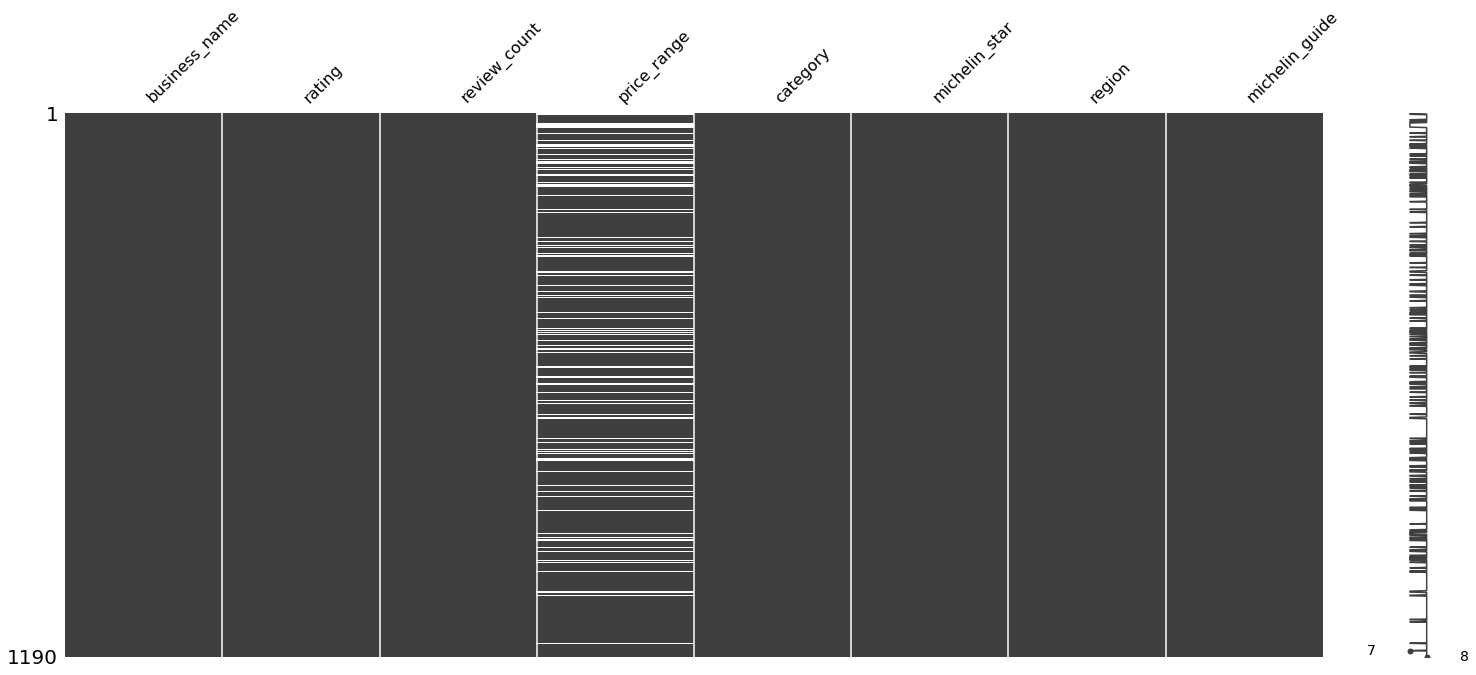

In [7]:
# Look at missingness in the data
miss.matrix(dat)

## Split

In [8]:
y = dat[['michelin_guide']]
X = dat.drop(columns=['business_name','category','michelin_star','michelin_guide'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

## Explore Training Set

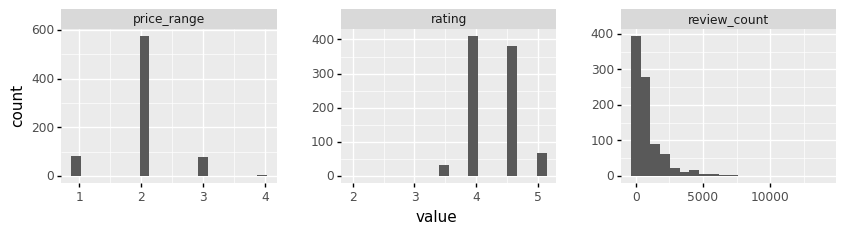

<ggplot: (276863079)>

In [9]:
# Plot the continuous variables
d = train_X.select_dtypes(include=["int","float"]).melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=20) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,2),
          subplots_adjust={'wspace':0.3,'hspace':0.3})
)